In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt
from scipy import stats

# Load data

In [2]:
df = pd.read_csv("./data/data-attendance-1.txt")
print(df.count())
df.head(5)

A        50
Score    50
Y        50
dtype: int64


,A,Score,Y
0,0,69,0.286
1,1,145,0.196
2,0,125,0.261
3,1,86,0.109
4,1,158,0.230


# Run Stan

In [3]:
model = CmdStanModel(stan_file="model/model5-3-exec2.stan")
print(model)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chap05/model/model5-3-exec2
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chap05/model/model5-3-exec2


CmdStanModel: name=model5-3-exec2
	 stan_file=/workdir/chap05/model/model5-3-exec2.stan
	 exe_file=/workdir/chap05/model/model5-3-exec2
	 compiler_optons=stanc_options=None, cpp_options=None


In [4]:
data = {
    "N": len(df),
    "A": df["A"].values,
    "Score": df["Score"].values/200.0,
    "Y": df["Y"].values
}

In [5]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1


# Access the result

In [6]:
print(type(fit))
print(fit)

<class 'cmdstanpy.stanfit.CmdStanMCMC'>
CmdStanMCMC: model=model5-3-exec2 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-1-x31pvb46.csv
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-2-2yt2f_7f.csv
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-3-jrg30z4e.csv
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-4-gc4aviqe.csv
 output_files:
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-1-x31pvb46-stdout.txt
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-2-2yt2f_7f-stdout.txt
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-3-jrg30z4e-stdout.txt
	/tmp/tmp43expnz2/model5-3-exec2-202009220516-4-gc4aviqe-stdout.txt


In [7]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 161)


In [8]:
for key, val in fit.stan_variables().items():
    print(key, val.shape)

b1 (4000,)
b2 (4000,)
b3 (4000,)
sigma (4000,)
mu (4000, 50)
y_pred (4000, 50)
epsilon (4000, 50)


In [9]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,120.844000,0.043224,1.532230,117.839000,121.223000,122.589000,1256.57,1137.17,1.001150
b1,0.124287,0.000900,0.033509,0.069999,0.124076,0.178511,1386.40,1254.66,1.001000
b2,-0.143841,0.000311,0.015357,-0.169543,-0.143499,-0.118841,2442.13,2210.07,0.999846
b3,0.323417,0.001406,0.053105,0.236831,0.323075,0.409208,1427.59,1291.93,1.001050
sigma,0.051820,0.000122,0.005522,0.043677,0.051293,0.061612,2055.24,1859.95,1.001200
...,...,...,...,...,...,...,...,...,...
epsilon[46],0.007900,0.000230,0.011000,-0.009400,0.008200,0.025000,2086.00,1887.00,1.000000
epsilon[47],-0.074000,0.000550,0.021000,-0.110000,-0.073000,-0.040000,1422.00,1287.00,1.000000
epsilon[48],-0.014000,0.000250,0.012000,-0.034000,-0.014000,0.006600,2440.00,2208.00,1.000000


In [10]:
# check convergence
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [11]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmp43expnz2/model5-3-exec2-202009220516-1-x31pvb46.csv, /tmp/tmp43expnz2/model5-3-exec2-202009220516-2-2yt2f_7f.csv, /tmp/tmp43expnz2/model5-3-exec2-202009220516-3-jrg30z4e.csv, /tmp/tmp43expnz2/model5-3-exec2-202009220516-4-gc4aviqe.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmp43expnz2/model5-3-exec2-202009220516-1-x31pvb46.csv, /tmp/tmp43expnz2/model5-3-exec2-202009220516-2-2yt2f_7f.csv, /tmp/tmp43expnz2/model5-3-exec2-202009220516-3-jrg30z4e.csv, /tmp/tmp43expnz2/model5-3-exec2-202009220516-4-gc4aviqe.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Plot results

In [12]:
print(fit.stan_variable("y_pred").shape)
y_pred_percentiles = np.percentile(fit.stan_variable("y_pred"), [10.0, 50.0, 90.0], axis=0)
print(y_pred_percentiles.shape)

(4000, 50)
(3, 50)


Text(0, 0.5, 'predicted')

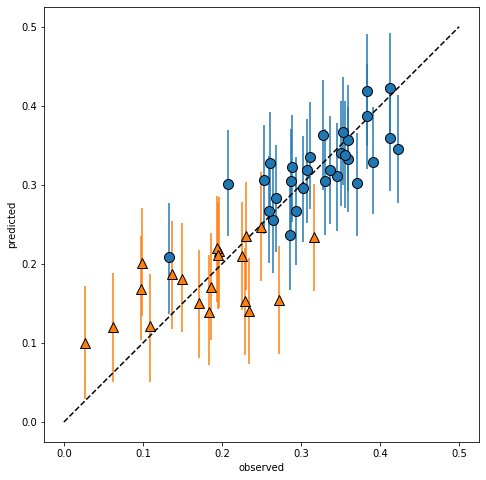

In [13]:
# observation vs. prediction

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

idx0 = np.where(df["A"].values == 0)[0]
idx1 = np.where(df["A"].values == 1)[0]

ax.errorbar(
    x=df["Y"].values[idx0], 
    y=y_pred_percentiles[1][idx0], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx0] - y_pred_percentiles[1][idx0]),
    fmt='o',
    markersize=10,
    markeredgecolor='k'
)

ax.errorbar(
    x=df["Y"].values[idx1], 
    y=y_pred_percentiles[1][idx1], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx1] - y_pred_percentiles[1][idx1]),
    fmt='^',
    markersize=10,
    markeredgecolor='k'
)

ax.plot([0.0, 0.5], [0.0, 0.5], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")

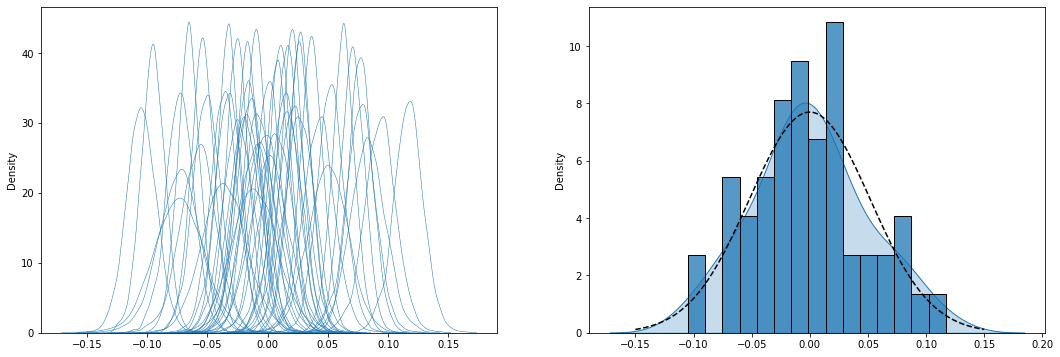

In [14]:
# residual error
# This is the contents of Exercise (2)

res_error = fit.stan_variable("epsilon")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i in range(len(df)):
    sns.kdeplot(ax=axes[0], x=res_error[:,i], color='C0', linewidth=0.5)

ax = axes[1]
xx = np.linspace(-0.15, 0.15, 101)
yy = stats.norm(loc=0, scale=fit.stan_variable("sigma").mean()).pdf(xx)
sns.kdeplot(ax=ax, x=res_error.mean(axis=0), fill=True, color="C0")
sns.histplot(ax=ax, x=res_error.mean(axis=0), bins=15, stat="density")
plt.plot(xx, yy, 'k--')